In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

In [2]:
df = pd.read_csv('student_study_habits.csv')
df.head()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
0,0.527230,0.685236,0.993245,0.222222,71.104897,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.421400,0.881883,0.883478,0.555556,62.240021,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.552393,0.220286,0.683469,1.000000,65.268855,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.698283,0.612594,0.520094,0.222222,66.609921,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.405419,0.369871,0.831127,0.333333,58.967484,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


In [3]:
df.describe()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,0.445603,0.506387,0.684110,0.533556,63.753071,0.202000,0.484000,0.890000,0.268000,0.228000,0.07800,0.618000,0.316000
std,0.162325,0.194923,0.214918,0.276109,7.114183,0.401894,0.500244,0.313203,0.443361,0.419963,0.26844,0.486363,0.465379
min,0.000000,0.000000,0.000000,0.000000,40.200403,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.327727,0.380942,0.530386,0.333333,58.813933,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.446577,0.505706,0.697383,0.555556,63.822553,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.550575,0.630248,0.844194,0.777778,68.588277,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,92.007807,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   study_hours_per_week            500 non-null    float64
 1   sleep_hours_per_day             500 non-null    float64
 2   attendance_percentage           500 non-null    float64
 3   assignments_completed           500 non-null    float64
 4   final_grade                     500 non-null    float64
 5   participation_level_Low         500 non-null    float64
 6   participation_level_Medium      500 non-null    float64
 7   internet_access_Yes             500 non-null    float64
 8   parental_education_High School  500 non-null    float64
 9   parental_education_Master's     500 non-null    float64
 10  parental_education_PhD          500 non-null    float64
 11  extracurricular_Yes             500 non-null    float64
 12  part_time_job_Yes               500 

In [5]:
df.isna().sum()

study_hours_per_week              0
sleep_hours_per_day               0
attendance_percentage             0
assignments_completed             0
final_grade                       0
participation_level_Low           0
participation_level_Medium        0
internet_access_Yes               0
parental_education_High School    0
parental_education_Master's       0
parental_education_PhD            0
extracurricular_Yes               0
part_time_job_Yes                 0
dtype: int64

Clean Dataset, with no Null value.
The dataset is scaled and transformed, Also, some of the columns are One Hot Encoded.

In [6]:
# Some columns can use merged
df["participation_level"] = df[["participation_level_Low", "participation_level_Medium"]].idxmax(axis=1)
df["participation_level"] = df["participation_level"].str.replace("participation_level_", "")

df["parental_education"] = df[["parental_education_High School", "parental_education_Master's", "parental_education_PhD"]].idxmax(axis=1)
df["parental_education"] = df["parental_education"].str.replace("parental_education_", "")

# Drop one-hot columns
df = df.drop(columns=[
    'participation_level_Low', 'participation_level_Medium',
    'parental_education_High School', "parental_education_Master's", 'parental_education_PhD'
])

# Data Visualization

Let's see the distribution of each column through Histogram Plot

In [7]:
import random

named_colors = ["red","blue","green","orange","purple","cyan","magenta","lime","gold","brown","pink","teal","olive","navy","maroon","indigo","coral","darkgreen","darkorange","mediumvioletred"]


def plot_histogram(dataframe, column):
    random_color = random.choice(named_colors)    # Randomly generate colors for visual
    
    plt.figure(figsize=(6,4))
    sns.set_style("whitegrid")
    sns.histplot(dataframe[column], bins=20, kde=True, color=random_color, stat='count')
    
    column_name = column.replace("_", " ").title()    # Formatting column name for Title
    plt.title(f"Distribution of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

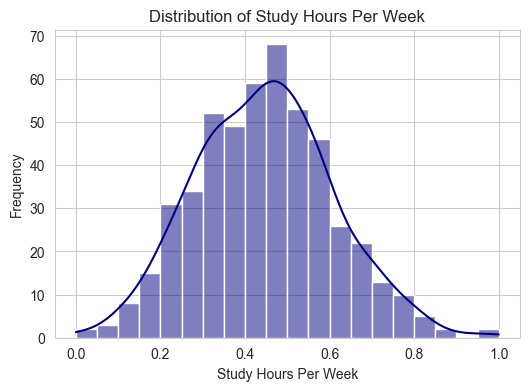

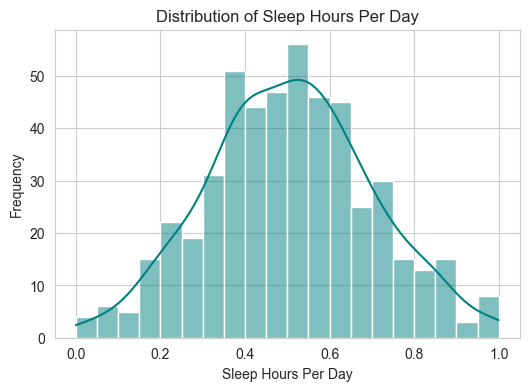

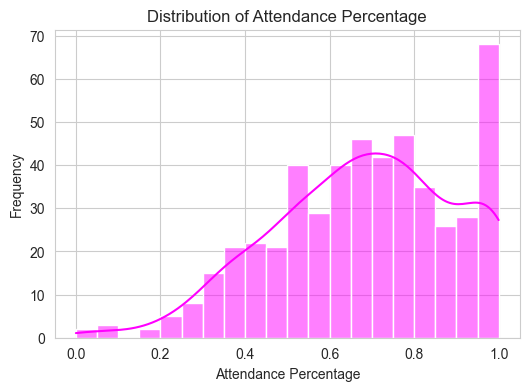

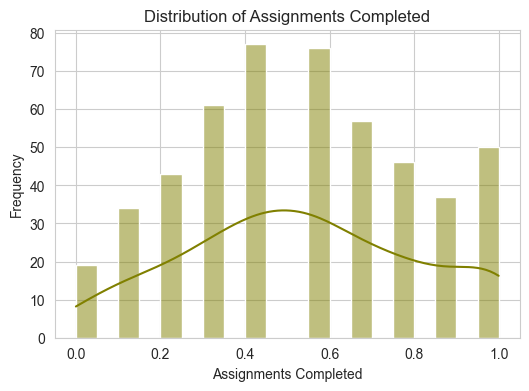

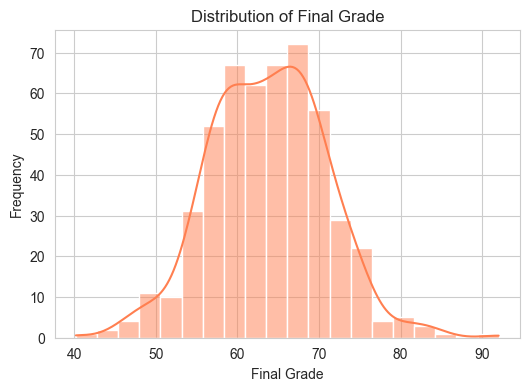

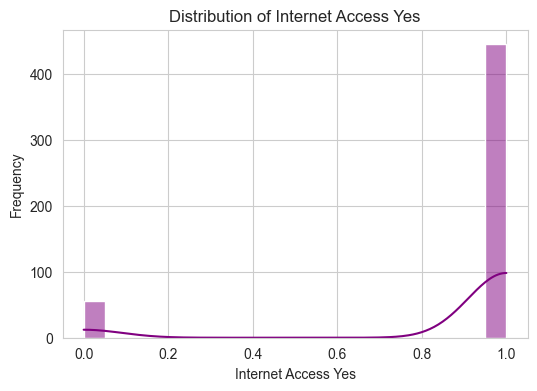

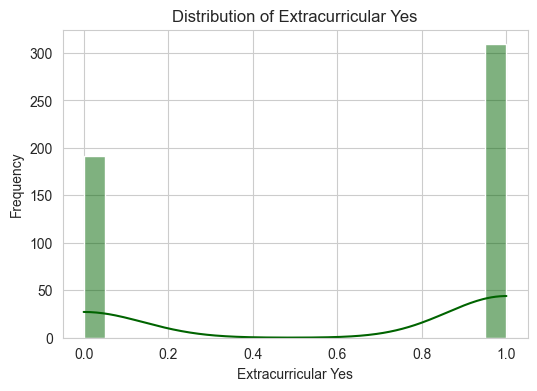

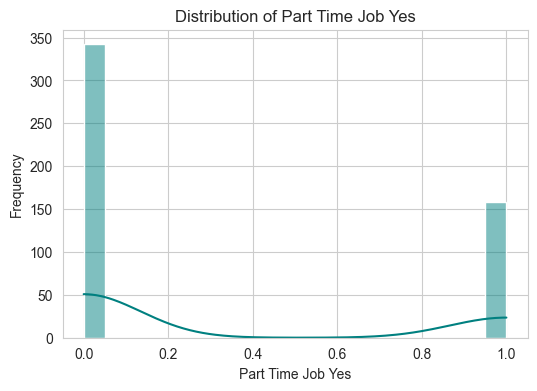

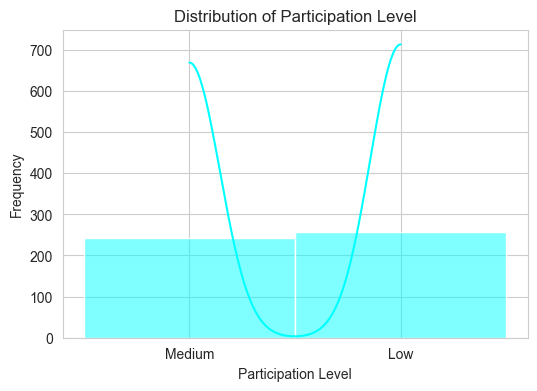

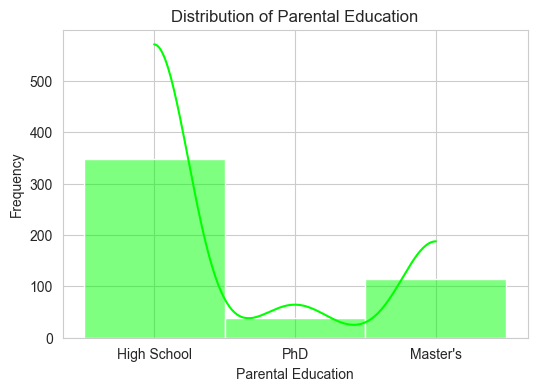

In [8]:
for i in df.columns:
    plot_histogram(df, i)

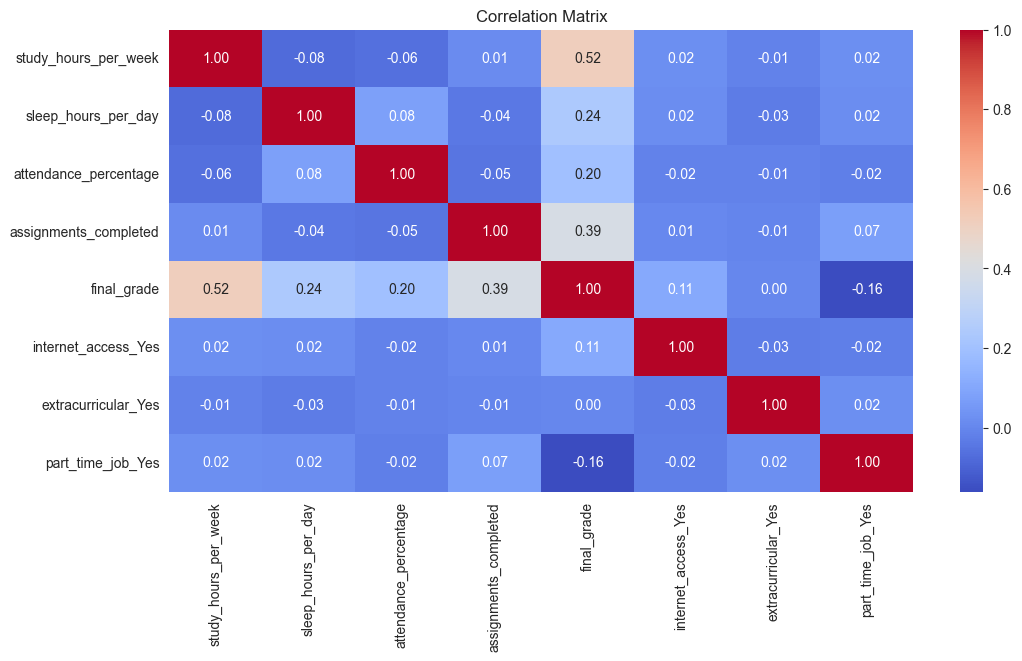

In [9]:
plt.figure(figsize=(12, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

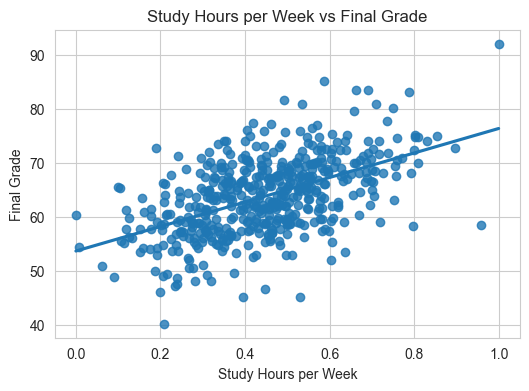

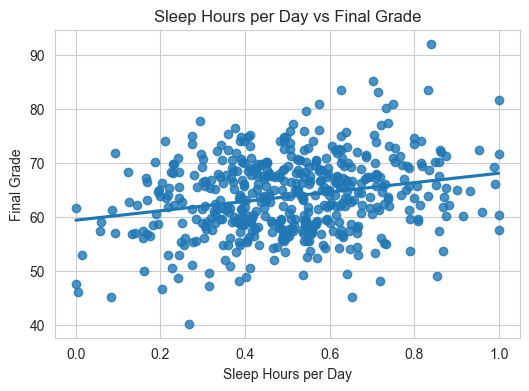

In [10]:
# Study hours vs grade
plt.figure(figsize=(6,4))
sns.regplot(x='study_hours_per_week', y='final_grade', data=df, ci=None)
plt.title("Study Hours per Week vs Final Grade")
plt.xlabel("Study Hours per Week")
plt.ylabel("Final Grade")
plt.show()

# Sleep hours vs grade
plt.figure(figsize=(6,4))
sns.regplot(x='sleep_hours_per_day', y='final_grade', data=df, ci=None)
plt.title("Sleep Hours per Day vs Final Grade")
plt.xlabel("Sleep Hours per Day")
plt.ylabel("Final Grade")
plt.show()

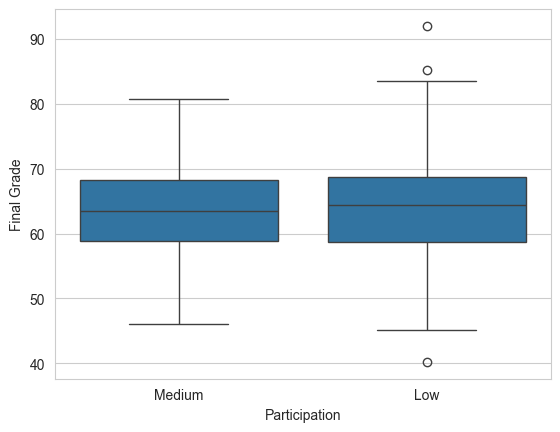

In [11]:
sns.boxplot(df, x="participation_level", y="final_grade")
plt.xlabel("Participation")
plt.ylabel("Final Grade")
plt.show()

From the graph, we can see that the participation doesn't quite affect the final grade. So, we can use label-encoding.

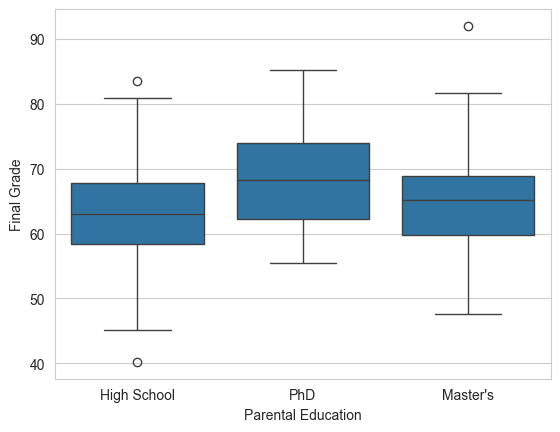

In [12]:
sns.boxplot(df, x="parental_education", y="final_grade")
plt.xlabel("Parental Education")
plt.ylabel("Final Grade")
plt.show()

From the graph, we can see that the parent's education does affect the final grade (Maybe the environemental change the growth of the student, and the literate parents makes the positive growth). So, we wil; use ordinal-encoding with priority as followed : "High School", "PhD", "Master's".

# Train Test Split and Preprocessing

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop("final_grade", axis=1)
y = df["final_grade"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

oe1 = OrdinalEncoder(categories=[['Low', 'Medium']])
oe2 = OrdinalEncoder(categories=[["High School", "Master's", "PhD"]])

preprocessor = ColumnTransformer(
    [
        ("OrdinalEncoder01", oe1, ["participation_level"]),
        ("OrdinalEncoder02", oe2, ["parental_education"])
    ],
    remainder='passthrough'  # this keeps the other 7 columns
)

preprocessor

,transformers,"[('OrdinalEncoder01', ...), ('OrdinalEncoder02', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,"[['Low', 'Medium']]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'


In [15]:
# Applying Transformation in Training dataset
X_train = preprocessor.fit_transform(X_train)

In [16]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8
0,1.0,1.0,0.264820,0.569516,0.635691,0.111111,0.0,1.0,1.0
1,1.0,0.0,0.463724,0.537322,0.731786,0.444444,1.0,0.0,0.0
2,1.0,0.0,0.620078,0.218308,0.795304,0.333333,1.0,1.0,0.0
3,1.0,0.0,0.279355,0.302079,0.739658,0.555556,0.0,0.0,0.0
4,0.0,0.0,0.549169,0.443643,0.808399,0.111111,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
370,1.0,1.0,0.758809,0.345242,0.811369,0.777778,1.0,0.0,1.0
371,1.0,1.0,0.684657,0.641550,0.922017,0.666667,1.0,0.0,1.0
372,0.0,0.0,0.324704,0.372452,0.353627,0.666667,1.0,1.0,0.0
373,1.0,0.0,0.456794,0.399589,0.735020,0.333333,1.0,0.0,0.0


In [17]:
## Apply transformation on Test data 
X_test = preprocessor.transform(X_test)

In [18]:
X_test

array([[0.        , 0.        , 0.69990093, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.70521839, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.80330819, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.46061044, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.48315339, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 2.        , 0.48052088, ..., 1.        , 0.        ,
        0.        ]])

# Model Training

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, HuberRegressor, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error

In [31]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Stochastic Gradient Descent': SGDRegressor(),
    'Huber Regressor': HuberRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Bagging Regressor': BaggingRegressor(),

    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gaussian Process': GaussianProcessRegressor(),

    'Dummy Regressor (Baseline)': DummyRegressor(strategy='mean')
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # training Set Performance
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_explained_var = explained_variance_score(y_train, y_train_pred)
    train_median_ae = median_absolute_error(y_train, y_train_pred)

    # ⬇️ Test Set Performance
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_explained_var = explained_variance_score(y_test, y_test_pred)
    test_median_ae = median_absolute_error(y_test, y_test_pred) 

    print(list(models.keys())[i])

    # Training Set Metrics
    print("\nModel Performance for Training Set:")
    print("Mean Absolute Error      : {:.4f}".format(train_mae))
    print("Mean Squared Error       : {:.4f}".format(train_mse))
    print("Median Absolute Error    : {:.4f}".format(train_median_ae))
    print("R-squared Score (R²)     : {:.4f}".format(train_r2))
    print("Explained Variance Score : {:.4f}".format(train_explained_var))
    
    # Test Set Metrics
    print("\nModel Performance for Test Set:")
    print("Mean Absolute Error      : {:.4f}".format(test_mae))
    print("Mean Squared Error       : {:.4f}".format(test_mse))
    print("Median Absolute Error    : {:.4f}".format(test_median_ae))
    print("R-squared Score (R²)     : {:.4f}".format(test_r2))
    print("Explained Variance Score : {:.4f}".format(test_explained_var))
    
    print("-" * 100, "\n")

Linear Regression

📊 Model Performance for Training Set:
Mean Absolute Error      : 3.2802
Mean Squared Error       : 17.0758
Median Absolute Error    : 2.7129
R-squared Score (R²)     : 0.6496
Explained Variance Score : 0.6496

📊 Model Performance for Test Set:
Mean Absolute Error      : 3.6678
Mean Squared Error       : 21.0229
Median Absolute Error    : 3.0453
R-squared Score (R²)     : 0.6235
Explained Variance Score : 0.6241
---------------------------------------------------------------------------------------------------- 

Ridge Regression

📊 Model Performance for Training Set:
Mean Absolute Error      : 3.3118
Mean Squared Error       : 17.2397
Median Absolute Error    : 2.7992
R-squared Score (R²)     : 0.6462
Explained Variance Score : 0.6462

📊 Model Performance for Test Set:
Mean Absolute Error      : 3.6811
Mean Squared Error       : 21.4048
Median Absolute Error    : 2.9658
R-squared Score (R²)     : 0.6166
Explained Variance Score : 0.6174
------------------------------

Let's create function so that we can get all metrics in dictionary for comparison

In [36]:
def evaluate_regression_models(models, X_train, y_train, X_test, y_test):
    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        test_metrics = {
            'MAE': mean_absolute_error(y_test, y_test_pred),
            'MSE': mean_squared_error(y_test, y_test_pred),
            'Median_AE': median_absolute_error(y_test, y_test_pred),
            'R2': r2_score(y_test, y_test_pred),
            'Explained_Var': explained_variance_score(y_test, y_test_pred)
        }

        results[name] = test_metrics

    return results

In [37]:
results_dict = evaluate_regression_models(models, X_train, y_train, X_test, y_test)

In [38]:
results_dict

{'Linear Regression': {'MAE': 3.6677788513400387,
  'MSE': 21.022864872111533,
  'Median_AE': 3.0452978617693915,
  'R2': 0.6234804789284605,
  'Explained_Var': 0.6241370911690864},
 'Ridge Regression': {'MAE': 3.6810809341367503,
  'MSE': 21.404841481789184,
  'Median_AE': 2.9657905202291346,
  'R2': 0.6166392776454162,
  'Explained_Var': 0.6173601400780911},
 'Lasso Regression': {'MAE': 5.8001570052119655,
  'MSE': 55.543294398468326,
  'Median_AE': 4.534697338264486,
  'R2': 0.005219567700798233,
  'Explained_Var': 0.005446902055255776},
 'ElasticNet Regression': {'MAE': 5.718226218900762,
  'MSE': 53.97371505695608,
  'Median_AE': 4.461016950923742,
  'R2': 0.03333073454437874,
  'Explained_Var': 0.03373542758368431},
 'Stochastic Gradient Descent': {'MAE': 3.635885038761238,
  'MSE': 20.70489186088118,
  'Median_AE': 3.0844179558837226,
  'R2': 0.6291753757291791,
  'Explained_Var': 0.6306155364066692},
 'Huber Regressor': {'MAE': 3.652135552766382,
  'MSE': 21.006314414390864,
  

In [43]:
results_df = pd.DataFrame(results_dict)
results_df

,Linear Regression,Ridge Regression,Lasso Regression,ElasticNet Regression,Stochastic Gradient Descent,Huber Regressor,Bayesian Ridge,Decision Tree,Random Forest,Gradient Boosting,AdaBoost,Bagging Regressor,Support Vector Regressor,K-Nearest Neighbors,Gaussian Process,Dummy Regressor (Baseline)
MAE,3.667779,3.681081,5.800157,5.718226,3.635885,3.652136,3.670079,5.638709,4.389484,4.054952,4.180242,4.476515,4.511887,4.689710,43.080581,5.809542
MSE,21.022865,21.404841,55.543294,53.973715,20.704892,21.006314,21.076377,46.538402,30.549698,26.063555,30.193350,32.592077,34.932596,40.656132,6196.786081,55.843936
Median_AE,3.045298,2.965791,4.534697,4.461017,3.084418,3.078282,3.086042,5.097040,3.496341,3.393784,3.257852,3.966385,3.539751,3.627638,16.353898,4.518834
R2,0.623480,0.616639,0.005220,0.033331,0.629175,0.623777,0.622522,0.166497,0.452855,0.533202,0.459237,0.416276,0.374357,0.271849,-109.984442,-0.000165
Explained_Var,0.624137,0.617360,0.005447,0.033735,0.630616,0.623790,0.623192,0.167242,0.457286,0.534192,0.466494,0.417129,0.374359,0.276411,-109.867327,0.000000


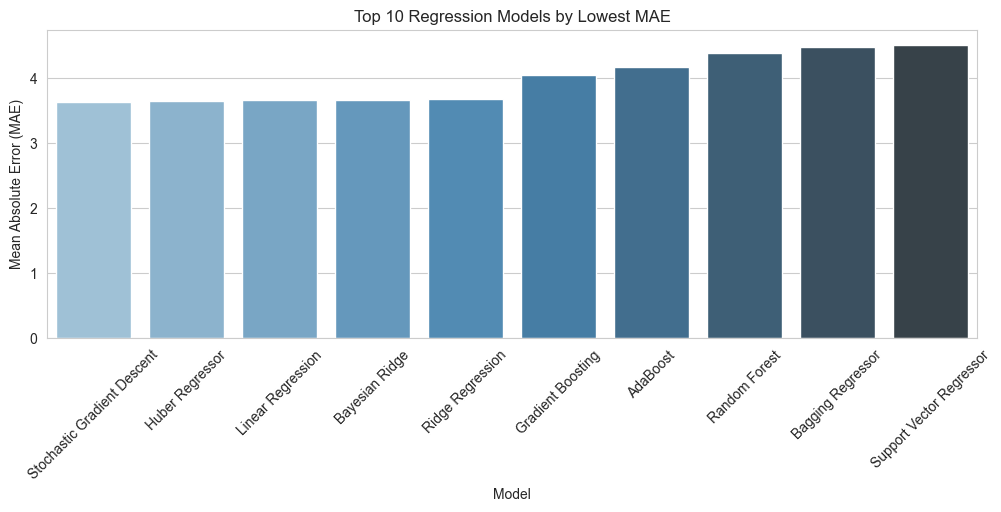

In [77]:
# Plot models by MAE
top_mae = results_df.loc['MAE'].sort_values(ascending=True).head(10).reset_index()
top_mae.columns = ['Model', 'MAE']


plt.figure(figsize=(12, 4))
# top_mae.plot(kind='bar', color='skyblue') 
sns.barplot(x='Model', y='MAE', data=top_mae, palette='Blues_d')
plt.title('Top 10 Regression Models by Lowest MAE')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)
# plt.tight_layout() 
plt.show()

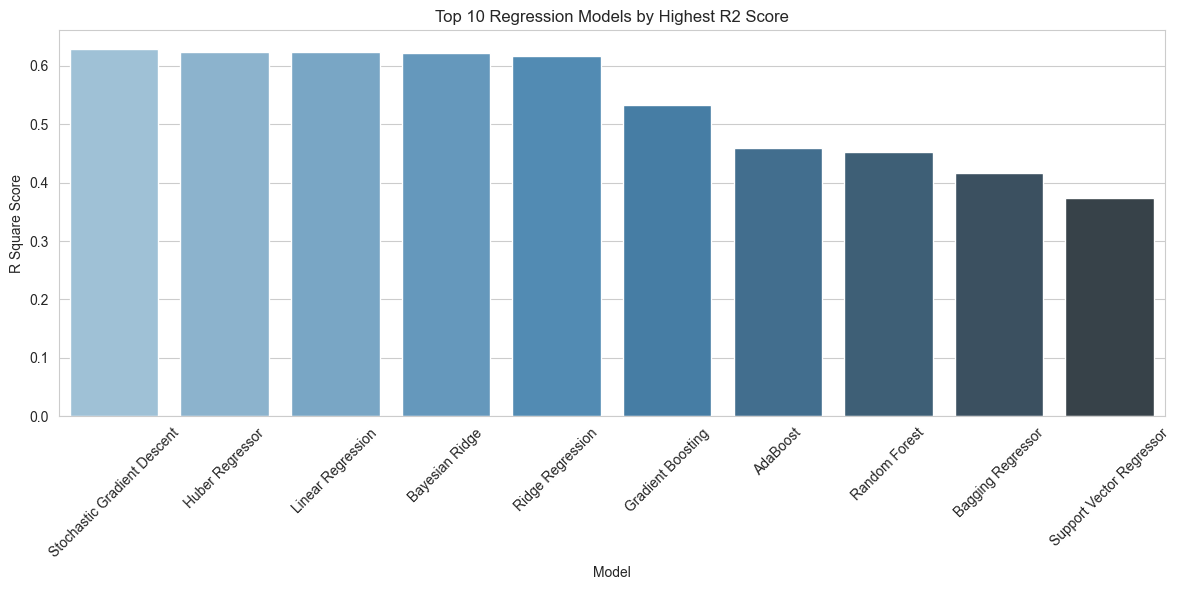

In [83]:
# Plot models by R2
top_r2 = results_df.loc['R2'].sort_values(ascending=False).head(10).reset_index()
top_r2.columns = ['Model', 'R2']


plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2', data=top_r2, palette='Blues_d')
plt.title('Top 10 Regression Models by Highest R2 Score')
plt.xlabel('Model')
plt.ylabel('R Square Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning with Random Forest Regression

In [154]:
rf_params = {
    "max_depth" : [10, 15, 20, 25, 30, None],
    "max_features" : ['sqrt', 'log2', 0.3, 0.5, 0.7, None],
    "min_samples_split" : [2, 5, 10, 20],
    "n_estimators" : [20, 35, 50, 75, 100], 
    "criterion" : ["squared_error", "absolute_error", "friedman_mse", "poisson"]
}

sgd_params = {
    "loss": ["squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
    "penalty": ["l2", "l1", "elasticnet"],
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1.0],
    "learning_rate": ["constant", "optimal", "invscaling", "adaptive"],
    "eta0": [0.001, 0.01, 0.1],        
    "max_iter": [1000, 2000, 5000],
    "tol": [1e-3, 1e-4, 1e-5],  
    "early_stopping": [True, False],
    "epsilon": [0.1, 0.2, 0.3]   
}

In [161]:
randomcv_models = [
    # ("RF", RandomForestRegressor(), rf_params),
    ("SGD", SGDRegressor(), sgd_params)    # Let's only focus on SGD for now
]
randomcv_models

[('SGD',
  SGDRegressor(),
  {'loss': ['squared_error',
    'huber',
    'epsilon_insensitive',
    'squared_epsilon_insensitive'],
   'penalty': ['l2', 'l1', 'elasticnet'],
   'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
   'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
   'eta0': [0.001, 0.01, 0.1],
   'max_iter': [1000, 2000, 5000],
   'tol': [0.001, 0.0001, 1e-05],
   'early_stopping': [True, False],
   'epsilon': [0.1, 0.2, 0.3]})]

In [157]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random_cv = RandomizedSearchCV(estimator=model, param_distributions=params,scoring="r2", n_iter=1000, cv=3, verbose=0, n_jobs=-1)
    random_cv.fit(X_train, y_train)
    model_param[name] = random_cv.best_params_

for model_name in model_param:
    print(f"-------------------------- Best Params for {model_name} --------------------------")
    print(model_param[model_name], "\n\n")

-------------------------- Best Params for SGD --------------------------
{'tol': 0.0001, 'penalty': 'l1', 'max_iter': 5000, 'loss': 'squared_epsilon_insensitive', 'learning_rate': 'adaptive', 'eta0': 0.1, 'epsilon': 0.2, 'early_stopping': True, 'alpha': 0.01} 




In [158]:
model_param

{'SGD': {'tol': 0.0001,
  'penalty': 'l1',
  'max_iter': 5000,
  'loss': 'squared_epsilon_insensitive',
  'learning_rate': 'adaptive',
  'eta0': 0.1,
  'epsilon': 0.2,
  'early_stopping': True,
  'alpha': 0.01}}

In [159]:
# Predict the Test data with the best model and best parameters 
best_model = SGDRegressor(**model_param['SGD'])
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [160]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred) 

print("Model Performance with Best Parameters:")
print("Mean Absolute Error      : {:.4f}".format(mae))
print("Mean Squared Error       : {:.4f}".format(mse))
print("Median Absolute Error    : {:.4f}".format(median_ae))
print("R-squared Score (R²)     : {:.4f}".format(r2))
print("Explained Variance Score : {:.4f}".format(explained_var))

Model Performance with Best Parameters:
Mean Absolute Error      : 3.6529
Mean Squared Error       : 21.0474
Median Absolute Error    : 2.9793
R-squared Score (R²)     : 0.6230
Explained Variance Score : 0.6233
